# Marr-Hildreth Edge Detection


# Algorithm 


$ \nabla^2 G(x,y) * I(x,y) $ Donde $G(x,y)$ es una dsitribucion gaussiana de 2 dimesiones y $\nabla^2$ es el Laplaciano, todo aplicado a la imagen $I$.


Al final queda: 

$ \nabla^2 G(x,y) * I(x,y)  = $



Link de la teoria: http://www.hms.harvard.edu/bss/neuro/bornlab/qmbc/beta/day4/marr-hildreth-edge-prsl1980.pdf

Link del ejemplo: https://github.com/adl1995/edge-detectors

## Example


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage import color
from mpl_toolkits.mplot3d import Axes3D

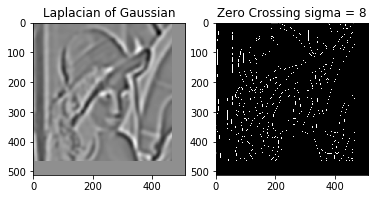

In [11]:
img = io.imread('lenna.png')
img = color.rgb2gray(img)
sigma = 8
size = int(2*(np.ceil(3*sigma))+1)

x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                   np.arange(-size/2+1, size/2+1))

normal = 1 / (2.0 * np.pi * sigma**2)

kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
    np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

kern_size = kernel.shape[0]
log = np.zeros_like(img, dtype=float)

# applying filter
for i in range(img.shape[0]-(kern_size-1)):
    for j in range(img.shape[1]-(kern_size-1)):
        window = img[i:i+kern_size, j:j+kern_size] * kernel
        log[i, j] = np.sum(window)

log = log.astype(np.int64, copy=False)

zero_crossing = np.zeros_like(log)

# computing zero crossing
for i in range(log.shape[0]-(kern_size-1)):
    for j in range(log.shape[1]-(kern_size-1)):
        if log[i][j] == 0:
            if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                zero_crossing[i][j] = 255
        if log[i][j] < 0:
            if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                zero_crossing[i][j] = 255

# plotting images
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(log, cmap='gray')
a.set_title('Laplacian of Gaussian')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(zero_crossing, cmap='gray')
string = 'Zero Crossing sigma = '
string += (str(sigma))
a.set_title(string)
plt.show()

    